In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/water-potability/water_potability.csv


*       ****MACHINE LEARNING AND DATA ANALYSIS ON WATER QUALITY PREDICTION BY MERENE ATTERH***
        

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import tensorflow.keras.layers 
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

* Organic contaminants  including solvents and pesticides, which are introduced through  industrial discharge can be responsible for  health problems such as  cancer.

* Inorganic pollutants, such as mineral acids, inorganic salts, metals, cyanides, and sulfates from illegal mining activities can be introduced into water bodies,causing skin lesions,cancer, cardiovascular diseases and so on.

* Waterborne pathogens including bacteria, viruses,and parasites  usually introduced to water via feces, can cause a range of illness from diarrhea to dysentery, hepatitis, typhoid fever, and cholera. 
* 

* Turbidity (lack of clarity caused by mixed-in particles) can give water an unacceptable taste, smell, or look. The level of harm caused by turbidity depends on the material present.

* Using data on various properties of water such as pH,hardness,conductivity,turbidity and others,I intend to perform data analysis and construct a machine learning model on water prediction
* Using data analysis techniques, I would probe into the relationship between the different factors
* The water_potability.csv file contains water quality metrics for 3276 different water bodies.

In [4]:
data1=pd.read_csv("../input/water-potability/water_potability.csv")
data1.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


* I extracted the data and generated a table showing the level of the different factors above

*Potable water comes from ground sources and is supposed to be treated before consumption
Water from natural sources is treated for microorganisms, bacteria, toxic chemicals, viruses and fecal matter. 
Drinking raw, untreated water can cause gastrointestinal problems such as diarrhea, vomiting or    fever.
The figure below illustrates the percentage of potability of the water samples.
From the graph, the number of potable water samples is less than the number of water samples that  cannot be treated for consumption*

* 0 - Not Potable
* 1 - Potable


<AxesSubplot:xlabel='Potability', ylabel='count'>

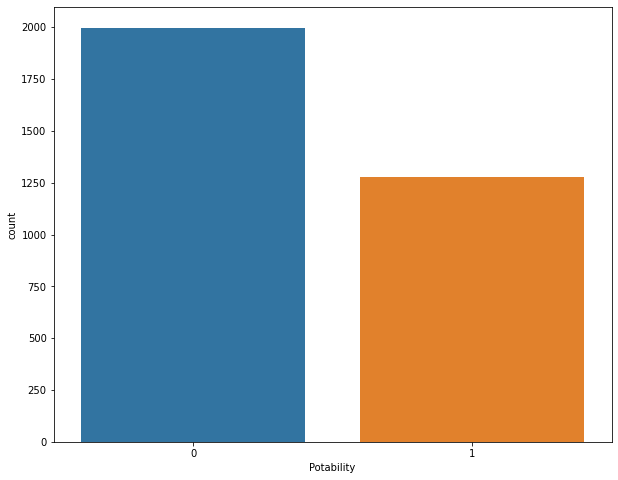

In [5]:
plt.figure(figsize=(10,8))
sns.countplot(data1['Potability'])

<AxesSubplot:>

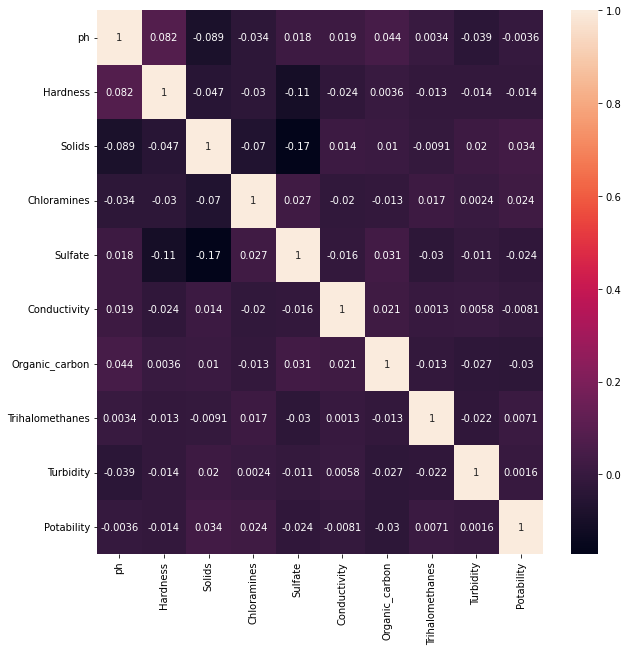

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True)

In [7]:
data1.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
#Dropping missing values
data1=data1.dropna()
data1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


**DATA ANALYSIS ON THE RELATIONSHIP BETWEEN PH, CONDUCTIVITY, AND POTABILITY OF WATER SAMPLES**

<AxesSubplot:xlabel='ph', ylabel='Conductivity'>

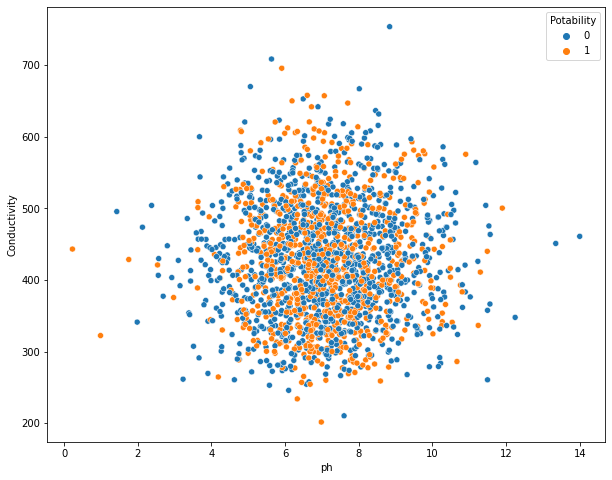

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data1['ph'],y=data1['Conductivity'],hue=data1.Potability,data=data1)


**ANALYSIS BETWEEN HARDNESS(PRESCENCE OF CALCIUM AND MAGNESIUM IONS),TURBIDITY, AND POTABILITY OF WATER**

<AxesSubplot:xlabel='Hardness', ylabel='Turbidity'>

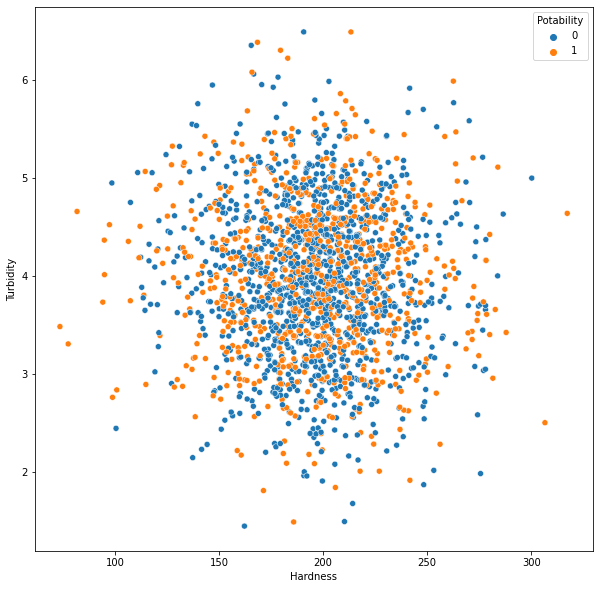

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data1['Hardness'],y=data1['Turbidity'],hue=data1.Potability,data=data1)

**MACHINE LEARNING MODEL ON WATER QUALITY PREDICTION**

In [11]:
var = ["Organic_carbon","Conductivity","Sulfate","Hardness","Trihalomethanes","ph","Chloramines",
"Turbidity","Solids"]
X = data1.iloc[:, 0:-1]
Y = data1.iloc[:, -1]
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
X_train_2v = X_train[["Sulfate", "Chloramines"]]
X_test_2v = X_test[["Sulfate", "Chloramines"]]


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Split the Dataset into Training and Test Datasets

from sklearn.model_selection import train_test_split

X = data1.drop(['Potability'],axis=1)
y = data1['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =42)

In [13]:
# Split the Dataset into Training and Test Datasets

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # median imputation ('mean' for mean and 'most_frequent' for mode imputations)

imputer.fit(X_train) # SimpleImputer() learns the median values from the train data

X_train = imputer.transform(X_train) # replace missing values with medians

X_test = imputer.transform(X_test) # replace missing values with medians


In [14]:
X_test = imputer.transform(X_test) # replace missing values with medians

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
## SVM Model Iplementation
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2]}
grid = GridSearchCV(svm,param_grid)
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [15]:
pred = grid.predict(X_test_scaled)
grid.best_estimator_

SVC(C=10, degree=2, kernel='poly')

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,plot_precision_recall_curve
confusion_matrix(pred,y_test)

array([[273, 137],
       [ 20,  73]])

In [17]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       410
           1       0.35      0.78      0.48        93

    accuracy                           0.69       503
   macro avg       0.64      0.73      0.63       503
weighted avg       0.82      0.69      0.72       503

